In [1]:
import pyift.pyift as ift
import matplotlib.pyplot as plt
import numpy as np

### Read the binary image of a text and create adjacency relations to label letters, words, and lines. 

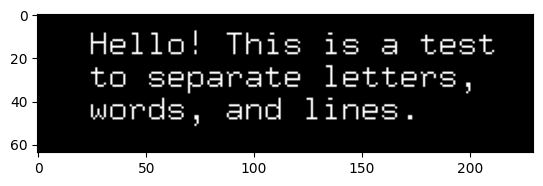

In [2]:
bin = ift.ReadImageByExt("images/text.png")
adj_letters = ift.Circular(np.sqrt(2.0))
adj_words   = ift.Circular(5.0)
adj_lines   = ift.Rectangular(30,5)
plt.imshow(bin.ToPlot())

### Assign a subsequent distinct number l=1,2,... to each binary component according to a given adjacency relation 

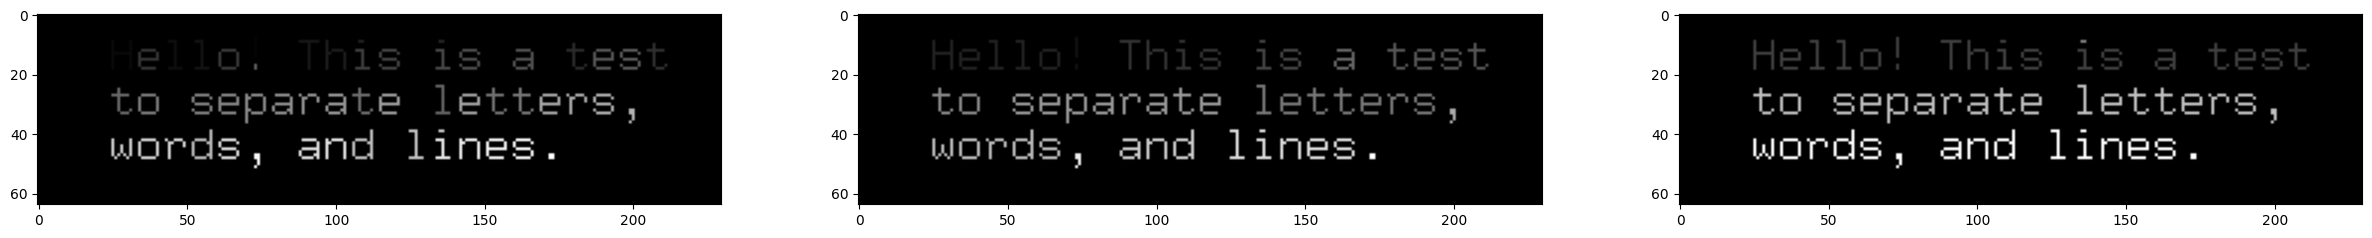

In [3]:
letters = ift.LabelComp(bin,adj_letters)
words   = ift.LabelComp(bin,adj_words)
lines   = ift.LabelComp(bin,adj_lines)
fig, axes = plt.subplots(1, 3, figsize=(30,10))
images = [letters, words, lines]
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].ToPlot())
plt.show()

### Improve visualization by coloring the labeled components

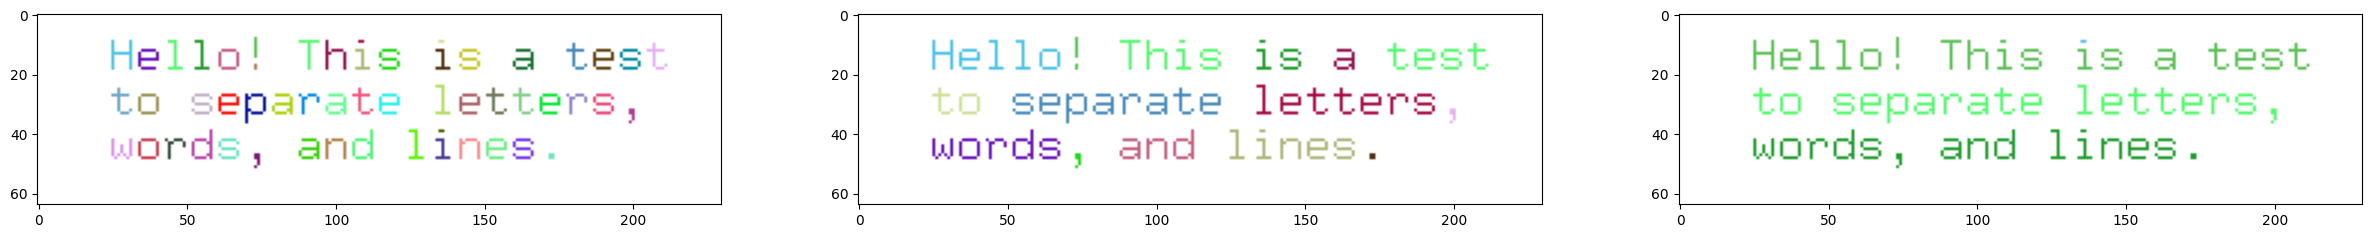

In [4]:
letters = ift.ColorizeComp(letters)
words   = ift.ColorizeComp(words)
lines   = ift.ColorizeComp(lines)
fig, axes = plt.subplots(1, 3, figsize=(30,10))
images = [letters, words, lines]
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].ToPlot())
plt.show()

### Separate the two nearest tools from the others

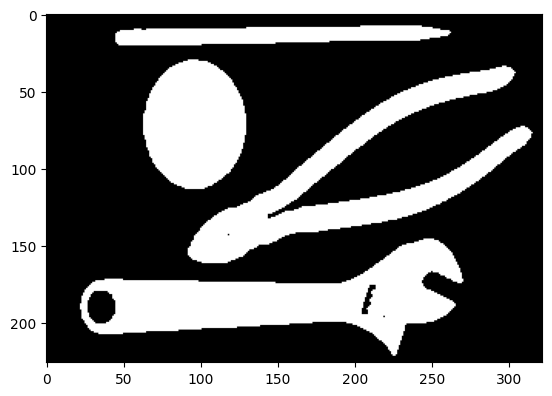

In [5]:
bin = ift.ReadImageByExt("images/tools.png")
plt.imshow(bin.ToPlot())

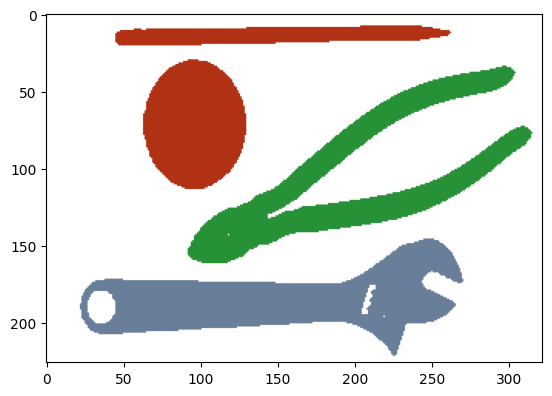

In [6]:
A = ift.Circular(10)
tools = ift.LabelComp(bin, A)
tools = ift.ColorizeComp(tools)
plt.imshow(tools.ToPlot())

### Remove the two smallest components

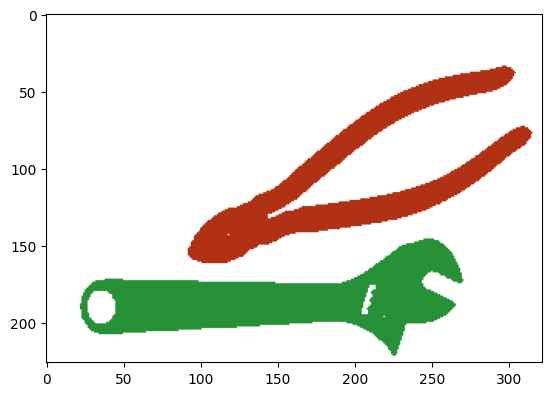

In [7]:
# a simplest option is to use ift.SelectCompAboveArea
# help(ift.SelectCompAboveArea)
# see also help(ift.SelectCompBelowArea)
area  = ift.ComponentArea(bin, None)
area  = ift.Threshold(area,5000,ift.MaximumValue(area),255)
tools = ift.LabelComp(area, None)
tools = ift.ColorizeComp(tools)
plt.imshow(tools.ToPlot())

### Select the largest component

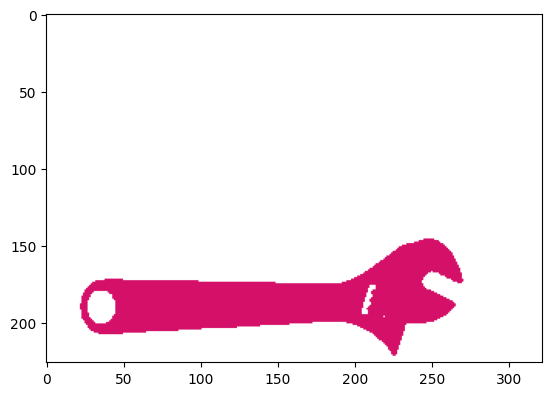

In [8]:
# see also help(ift.SelectSmallestComp)
tools = ift.SelectLargestComp(bin, None)
tools = ift.ColorizeComp(tools)
plt.imshow(tools.ToPlot())

### Select components wthin an area interval

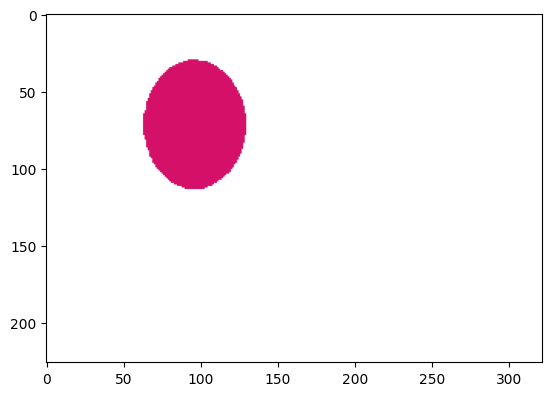

In [9]:
tools = ift.SelectCompInAreaInterval(bin, None, 3000, 5000)
tools = ift.ColorizeComp(tools)
plt.imshow(tools.ToPlot())